# 谈谈我对最小二乘法的简单理解

### 何为线性回归？
据我现在了解，线性回归可以简单理解为线性+回归。那么，什么是线性，什么是回归？

### **线性**具有两个性质：
①**可加性**，又称叠加性
$$f(x+y) = f(x) + f(y)$$
②**齐次性**，又称均匀性
$$f(ax) = af(x),其中，a为与x无关的常数$$
对以上两个性质进行结合，我们可以认为：
$$f(x,y) = f(ax+by) = af(x) + bf(y)$$
### 回归：确定多个变量间相互依赖的定量关系
tip：这个概念有点难理解，简单来说：在线性回归中，回归就是预测，需要预测的值是连续值这个点就OK。
### 损失函数(误差函数)
这个词放在这里有些突兀，但其实这个概念与解决线性回归问题密切相关。
我们先来举个例子：但我们需要去总结生活中一些现象时，总会发现有时候总结的东西与现象有一点点出入，这时候，出入就是用来描述损失函数的特点，没错，损失函数就是用来计算我们的预测跟实际的偏差。
**导引**：解决回归任务，实际就是找到一条线/超平面来**拟合**这些样本点，使他们之间的**误差尽可能的小。**而不同的线/超平面（不同的参数值）对应着不同的误差，我们需要找到让误差最小的线/超平面。
### 描述损失函数常用的公式
①均方误差MSE
$$MSE = {{1} \over {m}}\displaystyle \sum^{m}_{i=1}{(y_i-\hat{y_i})^2}$$
②均方根误差RMSE
$$RMSE = \sqrt {{{1} \over {m}}\displaystyle \sum^{m}_{i=1}{(y_i-\hat{y_i})^2}} $$
③平均绝对误差
$$MAE = {{1} \over {m}}\displaystyle \sum^{m}_{i=1}{|y_i-\hat{y_i}|}$$
④R平方(可觉系数)R-squared
$$R^2 = 1-{{MSE(\hat{y}-y)} \over {Var(y)}}$$
###  最小化损失函数
回归任务是拟合样本点，使误差尽可能的小。
我们来举个例子：我们凭自己短小的见解去认识现象时，发现好像用自己的认识去解释差别很大，这就好比损失函数，有大有小，那我们接下来讨论的就是，最小化损失函数

以一元线性函数为例$$y=kx+b$$采用均方误差MSE作为损失函数，那么损失函数是关于变量k,b的函数
    $$L(a,b) = {{1} \over {m}}\displaystyle \sum^{m}_{i=1}{((kx_i+b)-y_i)^2}$$
    其中，m为**样本个数**。此时任务为最小化**L(k, b)**。

求函数最小值，即求导让导数=0
由于这里是两个变量，则求**偏导数**，让**偏导数**=0

于是，对其中一个变量**b**求偏导数

$${\partial L \over \partial b} = \sum_{i=1}^m 2(kx_i+b-y_i)=0$$

$$\implies k\sum_{i=1}^mx_i+\sum_{i=1}^mb-\sum_{i=1}^my_i = 0$$

$$\implies km\bar{x}+mb-m\bar{y}=0\qquad A$$

$$\implies b = \bar{y} - k\bar{x}$$

对变量k求偏导数

$${\partial L \over \partial k} = \sum_{i=1}^m x_i(kx_i+b-y_i)=0$$

$$\implies k\sum_{i=1}^mx_i^2+b\sum_{i=1}^mx_i-\sum_{i=1}^mx_iy_i = 0$$

$$\implies k\sum_{i=1}^mx_i^2+mb\bar{x}-\sum_{i=1}^mx_iy_i = 0\qquad B$$

$$A * \bar{x} = km\bar{x}^2+mb\bar{x}-m\bar{y}\bar{x}=0\qquad C$$

$$B - C 得$$

$$\implies k = {{\sum_{i=1}^mx_iy_i-m\bar{x}\bar{y}} \over {\sum_{i=1}^mx_i^2-m\bar{x}^2}}$$

### 将一元变量推广到多元变量
多元函数式为$f(x_1,x_2,x_3,...,x_n) = \omega_1x_1+\omega_2x_2+\omega_3x_3+...+\omega_nx_n$

我们使用线性代数的向量概念对其进行整理，记$\omega_0=b$

$$\omega = 
\begin{pmatrix}
    \omega_0\\
    \omega_1\\
    \vdots\\
    \omega_n\\
\end{pmatrix}
x = 
\begin{pmatrix}
    x_0\\
    x_1\\
    \vdots\\
    x_n\\
\end{pmatrix}
$$

此时，损失函数可写成:
$$L(\omega,x) = \sum_{i=1}^m(y_i-\omega^Tx^{(i)})^2$$

其中，$y_i$为第i个真实值,$x^{(i)}$为第i个样本的特征向量

此时利用线性代数，把累加号去掉，使得式子更加简洁，方便推导

首先，将m个样本标签值堆叠成一个标签向量y

$$
y
= 
\begin{pmatrix}
    y_1\\
    y_2\\
    \vdots\\
    y_m\\
\end{pmatrix}
$$

接着，定义样本矩阵X，形状为(m, n+1)，m个样本，n+1个特征（其中第1个特征为1）

$$
\begin{pmatrix}
    1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)} \\
\end{pmatrix}
$$

那么样本矩阵$X$乘上权重向量$\omega$

可得预测值向量$$\hat{y}$$

$$
\begin{pmatrix}
    1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)} \\
\end{pmatrix}
\begin{pmatrix}
    \omega_0\\
    \vdots\\
    \omega_n\\
\end{pmatrix}
=
\begin{pmatrix}
    \hat{y}_1\\
    \vdots\\
    \hat{y}_m\\
\end{pmatrix}
$$


接着化简
$$
L(\omega)=\lVert X\omega-y \rVert^2\\
\qquad\qquad\quad\quad=(X^T\omega^T-y^T)(X\omega-y)\\
\qquad\qquad\qquad\qquad\qquad\quad=\omega^TX^TX\omega-\omega^TX^Ty-y^TX\omega+y^Ty\\
\qquad\qquad\quad\quad\quad\quad=\omega^TX^TX\omega-2\omega^TX^Ty+y^Ty
$$

$$
{\partial L(\omega) \over \partial \omega}={{\omega^TX^TX\omega-2\omega^TX^Ty+y^Ty} \over \partial \omega}\\
=2X^TX\omega-2X^Ty=0\\
\implies \omega = (X^TX)^{-1}X^Ty
$$

此时，$\omega$已成最简
#### 接下来引出波士顿数据集进行回归预测

1.代码封装

In [112]:
import numpy as np 
from sklearn.metrics import r2_score


class LinearRepression(object):
    def __init__(self):
        # 初始化 LinearRepression 模型
        self.interception_ = None  # 截距
        self.coef_ = None  # 系数
        self._theta = None

    def fit_normal(self, X_train, y_train):
        # 根据训练集 x_train, y_train 训练 linearRepression 模型
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self

    def predict(self, X_predict):
        assert X_predict.shape[1] == len(self.coef_), \
            'the length of coef_ must be equal to the column of X_predict'
        assert self.coef_ is not None and self.interception_ is not None, \
            "coef_ and interception cant' be None"
        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return X_b.dot(self._theta)

    def score(self, X_test, y_test):
        y_predict = self.predict(X_test)
        return r2_score(y_predict, y_test)

    def __repr__(self):
        return "LinearRepression()"

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [114]:
boston = datasets.load_boston()

In [115]:
X = boston.data
y = boston.target

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=888)

In [118]:
reg = LinearRepression()

In [119]:
reg.fit_normal(X_train, y_train)

LinearRepression()

In [120]:
reg.coef_

array([-1.19007229e-01,  3.64055815e-02,  1.68552680e-02,  2.29397031e+00,
       -1.60706448e+01,  3.72371469e+00,  9.22765437e-03, -1.30674803e+00,
        3.43072685e-01, -1.45830386e-02, -9.73486692e-01,  7.89797436e-03,
       -5.72555056e-01])

以上求出$\omega$系数

In [121]:
reg.interception_

37.100613538134596

以上求出截距$b$

In [122]:
reg.score(X_test, y_test) # 预估

0.728658184387332

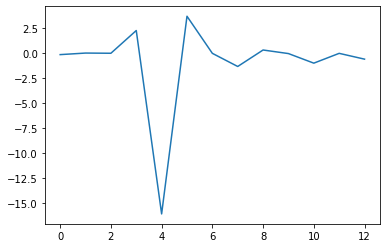

In [123]:
import matplotlib. pyplot as plt
%matplotlib inline

plt.plot(reg.coef_) #13列每一列的系数图

2.进行比较

In [124]:
reg.predict(X_test)# 预测值

array([22.17123289, 35.55703211, 20.8943971 , 20.19609888, 20.02689174,
       21.21700868, 30.82764123, 28.81457412, 24.62625139, 12.51737207,
       21.66809395, 26.01419263, 20.34518116, 23.2663366 , 22.11437669,
       13.07554361, 17.13768497, 21.97900546, 27.3708199 , 28.01916788,
       24.41448177, 34.36001821, 23.94274892, 26.83103321, 33.1323688 ,
       13.13104618, 20.66162225, 17.3953725 , 24.90599552, 25.93687134,
       25.43031713, 24.81956864, 17.66949657, 13.13904413, 22.14029635,
       35.50302904, 16.23087515, 19.89717175, 23.06369597, 20.00735812,
       32.84777096, 25.7275347 , 30.95015644, 23.70226829, 21.41232494,
       13.11049316, 33.15680287, 20.24535073, -5.21091931, 27.52962052,
       25.0985891 , 13.96531508, 14.09019168, 27.38604613, 14.21771639,
       25.46457847, 17.74201965, 19.33771417, 35.67022047, 26.05415131,
       32.57600176, 24.56533259, 31.75366611, 28.13798769, 31.05895476,
       24.53318847, 23.37137553, 30.55484544, 32.28276335, 20.87

In [125]:
y_test# 真实值

array([22.4, 32.4, 21.7, 24.5, 16.8, 21.1, 29.4, 28.7, 21.5, 13.6, 21.4,
       24.8, 16.8, 19.4, 21.7, 17.2, 17.1, 18.7, 22.3, 25. , 24.4, 34.6,
       20.1, 22.3, 26.7, 15.6, 19.5, 14.3, 22.7, 21.6, 25. , 24.7, 17.8,
       12.7, 22.7, 46.7, 20.2, 27.1, 25. , 19.9, 32. , 23.2, 32.2, 19.2,
       21. , 13.4, 31.6, 16.7,  7. , 24.5, 24.2, 11.5, 10.9, 22. , 15.7,
       25.3, 14.9, 15. , 33.4, 28.7, 50. , 25. , 29.9, 26.6, 28.7, 20.5,
       23. , 37. , 30.3, 16.2, 22.2, 19.9, 36. , 48.5, 26.4, 19.8, 17.8,
       38.7, 11.7, 13.8, 15.2, 30.1,  8.1, 30.1, 24. , 17.8, 13.8,  7.5,
       41.3, 20.1, 13.9, 50. , 20.3, 22.6, 25. , 20.5, 12.8, 19.5, 22. ,
       19.1, 24.6, 50. ])

In [133]:
X_test.shape # 得出多少个数据

(102, 13)

In [129]:
deviation = reg.predict(X_test) - y_test  # 预测值与实际值的偏差

In [130]:
deviation

array([-2.28767111e-01,  3.15703211e+00, -8.05602903e-01, -4.30390112e+00,
        3.22689174e+00,  1.17008684e-01,  1.42764123e+00,  1.14574124e-01,
        3.12625139e+00, -1.08262793e+00,  2.68093954e-01,  1.21419263e+00,
        3.54518116e+00,  3.86633660e+00,  4.14376695e-01, -4.12445639e+00,
        3.76849680e-02,  3.27900546e+00,  5.07081990e+00,  3.01916788e+00,
        1.44817665e-02, -2.39981785e-01,  3.84274892e+00,  4.53103321e+00,
        6.43236880e+00, -2.46895382e+00,  1.16162225e+00,  3.09537250e+00,
        2.20599552e+00,  4.33687134e+00,  4.30317129e-01,  1.19568635e-01,
       -1.30503429e-01,  4.39044130e-01, -5.59703648e-01, -1.11969710e+01,
       -3.96912485e+00, -7.20282825e+00, -1.93630403e+00,  1.07358117e-01,
        8.47770961e-01,  2.52753470e+00, -1.24984356e+00,  4.50226829e+00,
        4.12324937e-01, -2.89506841e-01,  1.55680287e+00,  3.54535073e+00,
       -1.22109193e+01,  3.02962052e+00,  8.98589097e-01,  2.46531508e+00,
        3.19019168e+00,  

In [131]:
RMSE = np.sqrt(np.sum(deviation * deviation)) / 102  # RMSE 均方根误差

In [132]:
RMSE

0.43277364023316384

### 综上，可见拟合程度不错，误差比较小

OK！misson complete！
$$designed\; by \qquad Lin Jhao\\
from \qquad Jhao's \;notebook$$